# 作業 : (Kaggle)房價預測

## 作業1
* 試著限制 '1樓地板面積(平方英尺)' (1stFlrSF) 欄位的上下限,   
  看看能否再進一步提高分數?

## 作業2
* 續前題, 去除離群值有兩類方式 :    
  捨棄離群值(刪除離群的資料) 以及調整離群值,  
  請試著用同樣的上下限, 改為 '捨棄離群值' 的方法, 
  看看結果會變好還是變差? 並試著解釋原因。

# [作業目標]
- 試著模仿範例寫法, 在房價預測中, 觀察去除離群值的影響  

# [作業重點]
- 觀察將極端值以上下限值取代, 對於分布與迴歸分數的影響 (In[5], Out[5])
- 觀察將極端值資料直接刪除, 對於分布與迴歸分數的影響 (In[6], Out[6])

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


In [2]:
data_path = './data/Part02/'

df_train = pd.read_csv(data_path + 'house_train.csv.gz')

train_Y = np.log1p(df_train['SalePrice'])
df = df_train.drop(['Id', 'SalePrice'] , axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [3]:
# 只取 int64、float64 兩種數值型欄位，並存進 num_features
num_features = []

for dtype , feature in zip(df.dtypes , df.columns):
    if dtype == 'float64' or dtype =='int64':
        num_features.append(feature)

print( f'{len(num_features)} Numeric Features : {num_features}\n' )

36 Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']



In [4]:
# 消滅文字型欄位，保留數值型欄位
df = df[num_features]

# 空值補 -1
df = df.fillna(-1)

# 最大最小化初始化
MMEncoder = MinMaxScaler()

In [5]:
train_num = train_Y.shape[0]
print(train_num)
df.head(7)

1460


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,480,40,30,0,320,0,0,700,10,2009
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,636,255,57,0,0,0,0,0,8,2007


## 作業1
* 試著限制 '1樓地板面積(平方英尺)' (1stFlrSF) 欄位的上下限,  
  看看能否再進一步提高分數?

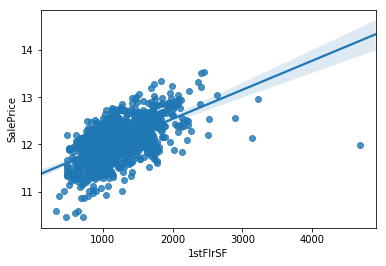

In [6]:
# 顯示 1stFlrSF 與目標值的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.regplot( x=df['1stFlrSF'][:train_num] , y=train_Y )
plt.show()

In [7]:
# 做線性回歸，觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator , train_X , train_Y , cv=5).mean()

C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.8466230778109456

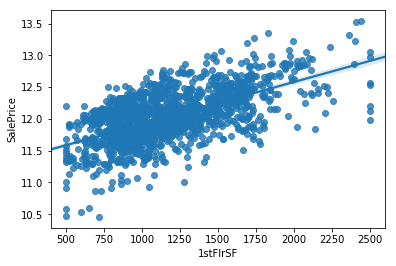

C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.8868529812963668

In [8]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 調整離群值
"""
Your Code Here
"""
df['1stFlrSF'] = df['1stFlrSF'].clip(500,2500)

sns.regplot( x=df['1stFlrSF'] , y=train_Y )
plt.show()


# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

## 作業2
* 續前題, 去除離群值有兩類方式 :  捨棄離群值(刪除離群的資料) 以及調整離群值，請試著用同樣的上下限，改為 '捨棄離群值' 的方法, 看看結果會變好還是變差? 並試著解釋原因。

  捨棄離群值後效果變好，因為捨棄後不受離群值引響，故效果較好。

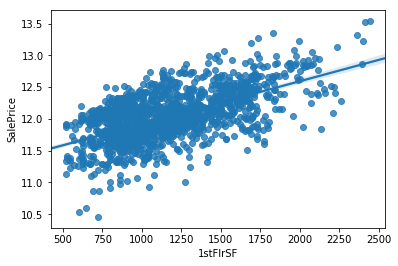

C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.8934940827460055

In [9]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 捨棄離群值
"""
Your Code Here
"""
keep_indexs = (df['1stFlrSF']>500) & (df['1stFlrSF']<2500)
df = df[keep_indexs]

train_Y = train_Y[keep_indexs]
sns.regplot(x=df['1stFlrSF'] , y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()